In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# 2. Imports
import os, glob, random, shutil

# 3. Settings
yolo_root  = '/content/drive/MyDrive/yolo'
images_dir = os.path.join(yolo_root, 'images')
labels_dir = os.path.join(yolo_root, 'labels')
TASK_IDS   = ['945605', '908622']
split_root = os.path.join(yolo_root, 'subset_80_10_10')

# 4-9. Only proceed if images & labels directories exist
if os.path.isdir(images_dir) and os.path.isdir(labels_dir):
    # Create split directories
    for split in ['train', 'val', 'test']:
        os.makedirs(os.path.join(split_root, split, 'images'), exist_ok=True)
        os.makedirs(os.path.join(split_root, split, 'labels'), exist_ok=True)

    # Gather and shuffle images from specified tasks
    all_imgs = []
    for tid in TASK_IDS:
        all_imgs += glob.glob(os.path.join(images_dir, f'{tid}_*.jpg'))
        all_imgs += glob.glob(os.path.join(images_dir, f'{tid}_*.png'))
    random.seed(42)
    random.shuffle(all_imgs)

    # Compute split sizes
    N = len(all_imgs)
    n_train = int(0.8 * N)
    n_val   = int(0.1 * N)

    # Distribute images into train/val/test
    splits = {
        'train': all_imgs[:n_train],
        'val':   all_imgs[n_train:n_train + n_val],
        'test':  all_imgs[n_train + n_val:]
    }

    # Copy images and corresponding labels
    for split, img_list in splits.items():
        for img_path in img_list:
            fname    = os.path.basename(img_path)
            stem, _  = os.path.splitext(fname)
            lbl_path = os.path.join(labels_dir, f'{stem}.txt')

            shutil.copy2(img_path, os.path.join(split_root, split, 'images', fname))
            if os.path.exists(lbl_path):
                shutil.copy2(lbl_path, os.path.join(split_root, split, 'labels', f'{stem}.txt'))
            else:
                print(f'⚠️  No label for {fname}')

    # Write dataset.yaml
    dataset_yaml = f"""
    train: {os.path.join(split_root, 'train', 'images')}
    val:   {os.path.join(split_root, 'val', 'images')}
    test:  {os.path.join(split_root, 'test', 'images')}

    nc: 2
    names:
      0: Zip
      1: Buttons
    """
    yaml_path = os.path.join(split_root, 'dataset.yaml')
    with open(yaml_path, 'w') as f:
        f.write(dataset_yaml.strip() + '\n')

    print(f"✅ Done! Dataset split created and YAML saved to:\n{yaml_path}")
else:
    print(f"⚠️  Directories not found: {images_dir} or {labels_dir}")

✅ Done! Dataset split created and YAML saved to:
/content/drive/MyDrive/yolo/subset_80_10_10/dataset.yaml


In [ ]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
#!yolo detect train \
  model=/content/drive/MyDrive/yolo/yolo11s.pt \
  data=/content/drive/MyDrive/yolo/subset_80_10_10/dataset.yaml \
  imgsz=1280 \
  batch=12 \
  half=True \
  workers=8 \
  epochs=1500 \
  patience=50 \
  augment=True \
  cache=disk \
  project=/content/drive/MyDrive/yolo/projects \
  name=yolo11s_colab_run_945605_908622

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolo/subset_80_10_10/dataset.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1500, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo/yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11s_colab_run_945605_9086227, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto

In [ ]:
# 0. (If not already) install/update the YOLO CLI
!pip install ultralytics --upgrade
#  data=/content/drive/MyDrive/yolo/subset_80_10_10_new/dataset_new.yaml \
# data=/content/drive/MyDrive/yolo/subset_80_10_10/dataset.yaml \
# 2. Evaluate on your untouched test split
!yolo detect val \
  model=/content/drive/MyDrive/yolo/projects/yolo11s_colab_run_945605_9086227/weights/best.pt \
  data=/content/drive/MyDrive/yolo/subset_80_10_10/dataset.yaml \
  split=test \
  imgsz=1280 \
  batch=16 \
  plots=True


Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.3 ms, read: 6.0±4.6 MB/s, size: 13.9 KB)
val: Scanning /content/drive/MyDrive/yolo/subset_80_10_10/test/labels.cache... 168 images, 3 backgrounds, 0 corrupt: 100% 168/168 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:09<00:00,  1.13it/s]
                   all        168        687      0.929      0.948      0.952      0.522
                   Zip        113        223      0.923      0.964      0.957       0.59
                Button         64        464      0.935      0.931      0.947      0.454
Speed: 14.6ms preprocess, 29.7ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/yolo/projects/yolo11s_colab_run_945605_9086227/weights/best.pt")
print(model.names)


{0: 'Zip', 1: 'Button'}


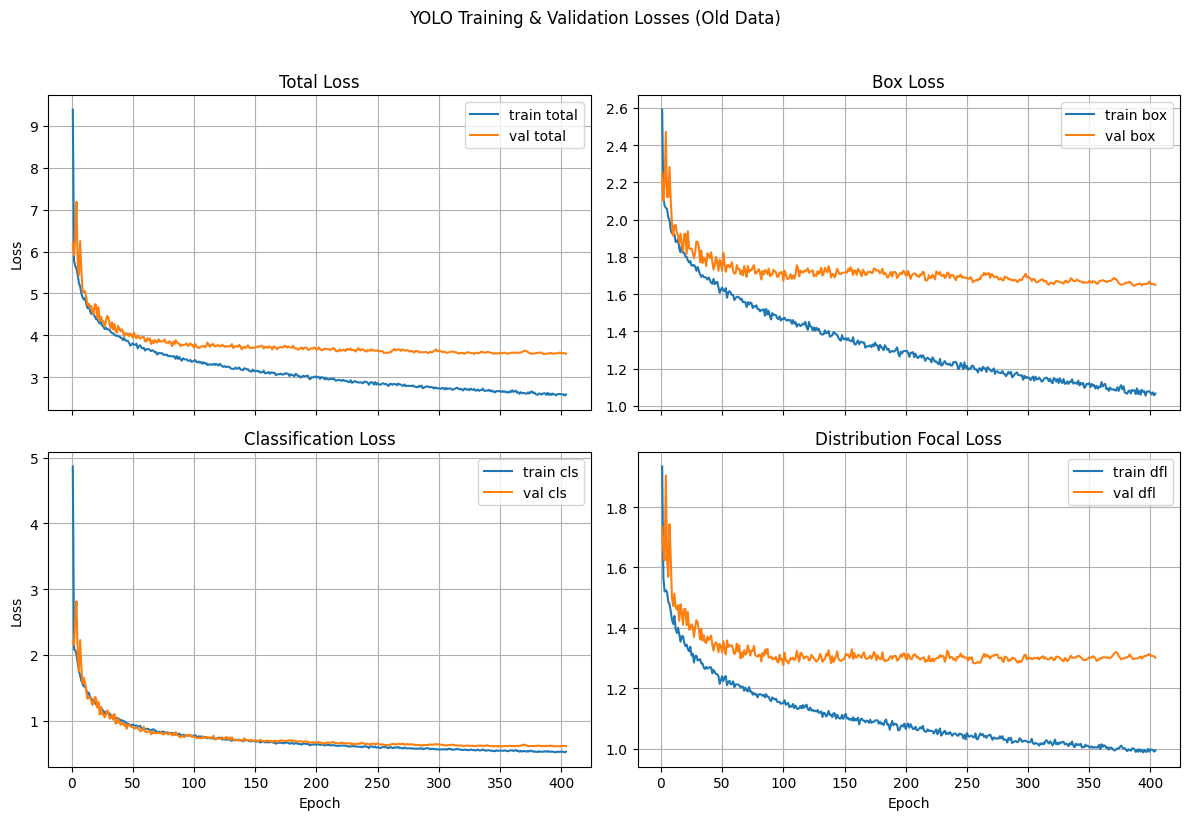

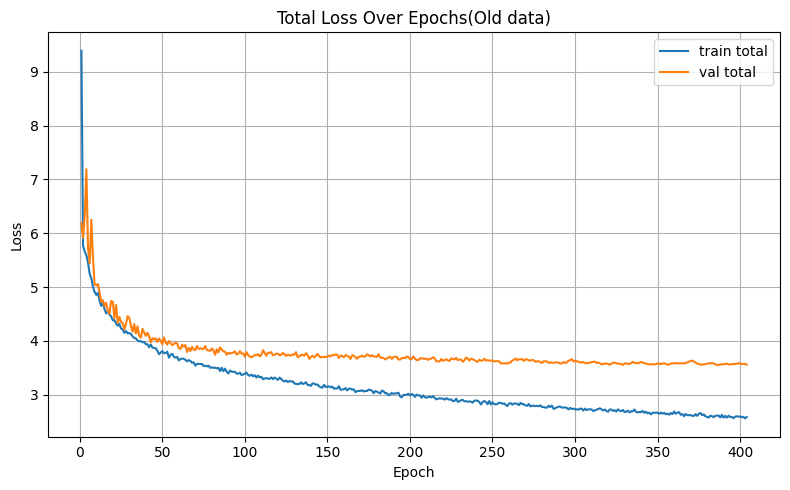

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your single results.csv
csv_path = '/content/drive/MyDrive/yolo/projects/yolo11s_colab_run_945605_9086227/results.csv'

# 1. Load metrics CSV
df = pd.read_csv(csv_path)

# 2. Compute total loss for train and val
df['train/total_loss'] = df['train/box_loss'] + df['train/cls_loss'] + df['train/dfl_loss']
df['val/total_loss']   = df['val/box_loss']   + df['val/cls_loss']   + df['val/dfl_loss']

# 3. Set up a 2×2 grid of subplots for individual losses
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
fig.suptitle('YOLO Training & Validation Losses (Old Data)', y=1.02)

# Top-left: Total Loss
axes[0, 0].plot(df['epoch'], df['train/total_loss'], label='train total')
axes[0, 0].plot(df['epoch'], df['val/total_loss'],   label='val total')
axes[0, 0].set_title('Total Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Top-right: Box Loss
axes[0, 1].plot(df['epoch'], df['train/box_loss'], label='train box')
axes[0, 1].plot(df['epoch'], df['val/box_loss'],   label='val box')
axes[0, 1].set_title('Box Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Bottom-left: Classification Loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train cls')
axes[1, 0].plot(df['epoch'], df['val/cls_loss'],   label='val cls')
axes[1, 0].set_title('Classification Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Bottom-right: Distribution Focal Loss
axes[1, 1].plot(df['epoch'], df['train/dfl_loss'], label='train dfl')
axes[1, 1].plot(df['epoch'], df['val/dfl_loss'],   label='val dfl')
axes[1, 1].set_title('Distribution Focal Loss')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# 4. Separate figure for Total Loss only
plt.figure(figsize=(8, 5))
plt.plot(df['epoch'], df['train/total_loss'], label='train total')
plt.plot(df['epoch'], df['val/total_loss'],   label='val total')
plt.title('Total Loss Over Epochs(Old data)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import os
import glob
import pandas as pd
from PIL import Image

# ─── CONFIGURE HERE ──────────────────────────────────────────────────────────
BASE_DIR = "/content/drive/MyDrive/yolo_colab/subset_80_10_10"
SPLITS   = ["train", "val", "test"]
IMAGE_EXTS = [".jpg", ".jpeg", ".png"]
# ─────────────────────────────────────────────────────────────────────────────

# Containers
resolution_counts = {}
bbox_records = []

# Loop over splits
for split in SPLITS:
    img_dir = os.path.join(BASE_DIR, split, "images")
    lbl_dir = os.path.join(BASE_DIR, split, "labels")
    if not (os.path.isdir(img_dir) and os.path.isdir(lbl_dir)):
        raise FileNotFoundError(f"Cannot find directories for split: {split}")

    # Process each image
    for fname in os.listdir(img_dir):
        if not any(fname.lower().endswith(ext) for ext in IMAGE_EXTS):
            continue
        stem, _ = os.path.splitext(fname)
        img_path = os.path.join(img_dir, fname)

        # 1) Read image size
        with Image.open(img_path) as img:
            w, h = img.size
        res = f"{w}×{h}"
        resolution_counts[res] = resolution_counts.get(res, 0) + 1

        # 2) Read corresponding label
        lbl_path = os.path.join(lbl_dir, stem + ".txt")
        if not os.path.isfile(lbl_path):
            continue
        with open(lbl_path) as f:
            for line in f:
                parts = line.split()
                if len(parts) != 5:
                    continue
                cls_id = int(parts[0])
                w_norm = float(parts[3])
                h_norm = float(parts[4])
                w_px = w_norm * w
                h_px = h_norm * h
                bbox_records.append({
                    "resolution": res,
                    "class_id": cls_id,
                    "bbox_w_px":   w_px,
                    "bbox_h_px":   h_px,
                    "bbox_area_px":w_px * h_px,
                    "bbox_w_norm": w_norm,
                    "bbox_h_norm": h_norm,
                    "bbox_area_norm": w_norm * h_norm
                })

# Build DataFrames
res_df = pd.DataFrame(
    [{"resolution": r, "image_count": c} for r, c in sorted(resolution_counts.items())]
)

df = pd.DataFrame(bbox_records)
df["class_name"] = df["class_id"].map({0: "Zip", 1: "Button"})

# Aggregate statistics by resolution and class
stats = df.groupby(["resolution", "class_name"]).agg({
    "bbox_w_px":   ["mean","median","min","max","std"],
    "bbox_h_px":   ["mean","median","min","max","std"],
    "bbox_area_px":["mean","median","min","max","std"],
    "bbox_w_norm": ["mean","median","min","max","std"],
    "bbox_h_norm": ["mean","median","min","max","std"],
    "bbox_area_norm":["mean","median","min","max","std"],
}).reset_index()

# Print results
print("\n=== Image Resolution Distribution ===")
print(res_df.to_string(index=False))

print("\n=== Bounding Box Size Statistics by Resolution & Class ===")
print(stats.to_string(index=False))


KeyboardInterrupt: 

In [ ]:
import os
import glob
import pandas as pd
from PIL import Image

# ─── CONFIGURE HERE ──────────────────────────────────────────────────────────
BASE_DIR   = "/content/drive/MyDrive/yolo_colab/subset_80_10_10"
SPLITS     = ["train", "val", "test"]
IMAGE_EXTS = [".jpg", ".jpeg", ".png"]
# ─────────────────────────────────────────────────────────────────────────────

# Containers
resolution_counts = {}
bbox_records     = []

# Loop over splits
for split in SPLITS:
    img_dir = os.path.join(BASE_DIR, split, "images")
    lbl_dir = os.path.join(BASE_DIR, split, "labels")
    if not (os.path.isdir(img_dir) and os.path.isdir(lbl_dir)):
        raise FileNotFoundError(f"Cannot find directories for split: {split}")

    # Process each image
    for fname in os.listdir(img_dir):
        if not any(fname.lower().endswith(ext) for ext in IMAGE_EXTS):
            continue
        stem, _ = os.path.splitext(fname)
        img_path = os.path.join(img_dir, fname)

        # 1) Read image size
        with Image.open(img_path) as img:
            w, h = img.size
        res = f"{w}×{h}"
        resolution_counts[res] = resolution_counts.get(res, 0) + 1

        # 2) Read corresponding label
        lbl_path = os.path.join(lbl_dir, stem + ".txt")
        if not os.path.isfile(lbl_path):
            continue
        with open(lbl_path) as f:
            for line in f:
                parts = line.split()
                if len(parts) != 5:
                    continue
                cls_id   = int(parts[0])
                w_norm   = float(parts[3])
                h_norm   = float(parts[4])
                w_px     = w_norm * w
                h_px     = h_norm * h
                bbox_records.append({
                    "resolution":     res,
                    "class_id":       cls_id,
                    "bbox_w_px":      w_px,
                    "bbox_h_px":      h_px,
                    "bbox_area_px":   w_px * h_px,
                    "bbox_w_norm":    w_norm,
                    "bbox_h_norm":    h_norm,
                    "bbox_area_norm": w_norm * h_norm
                })

# Build DataFrames
res_df = pd.DataFrame(
    [{"resolution": r, "image_count": c} for r, c in sorted(resolution_counts.items())]
)

df = pd.DataFrame(bbox_records)
df["class_name"] = df["class_id"].map({0: "Zip", 1: "Button"})

# Aggregate statistics by resolution and class
stats = df.groupby(["resolution", "class_name"]).agg({
    "bbox_w_px":      ["mean","median","min","max","std"],
    "bbox_h_px":      ["mean","median","min","max","std"],
    "bbox_area_px":   ["mean","median","min","max","std"],
    "bbox_w_norm":    ["mean","median","min","max","std"],
    "bbox_h_norm":    ["mean","median","min","max","std"],
    "bbox_area_norm": ["mean","median","min","max","std"],
}).reset_index()

# --- NEW: save CSVs for easy downstream handling ---
out_dir = BASE_DIR  # or wherever you like
os.makedirs(out_dir, exist_ok=True)

res_df.to_csv(os.path.join(out_dir, "resolution_counts.csv"), index=False)
stats.to_csv(os.path.join(out_dir,    "bbox_stats_by_res_and_class.csv"), index=False)

# Print results
print("\n=== Image Resolution Distribution ===")
print(res_df.to_string(index=False))

print("\n=== Bounding Box Size Statistics by Resolution & Class ===")
print(stats.to_string(index=False))



=== Image Resolution Distribution ===
resolution  image_count
 1000×1156            4
  1000×693            6
 1022×1400            4
 1080×1410            4
  1100×820            2
 1156×1000            2
 1200×1500            4
 1400×1022            2
 1410×1080            2
 1500×1200            2
 1500×1500            6
 1600×2400            4
   163×308            8
   168×299            2
   168×300           10
   169×298            6
   175×288            8
   178×284            8
   180×280           16
   183×275           92
   184×275            2
   185×273            8
   186×271           10
   186×272            2
   187×270           12
   188×267            4
   188×268           28
   189×267           24
   190×265            8
   190×266           64
   191×263            6
   192×263           12
   193×261            2
   194×259          126
   194×260            6
   197×255            8
   197×256           12
   198×254            8
   199×254            8
 

In [ ]:
import os, glob, pandas as pd

# ─── CONFIGURE HERE ──────────────────────────────────────────────────────────
BASE_DIR = "/content/drive/MyDrive/yolo_colab/subset_80_10_10"
# ─────────────────────────────────────────────────────────────────────────────

# 1) List every CSV in BASE_DIR so you can see their real names:
csv_paths = glob.glob(os.path.join(BASE_DIR, "*.csv"))
print("Found these CSVs:\n", "\n".join(csv_paths))

# 2) Automatically pick the “resolution” file and the “stats” file by keyword:
res_file   = next(p for p in csv_paths if "resolution" in os.path.basename(p).lower())
stats_file = next(p for p in csv_paths if "stat"       in os.path.basename(p).lower())

print(f"\nLoading:\n • {res_file}\n • {stats_file}\n")

# 3) Load them
res_df   = pd.read_csv(res_file)
stats_df = pd.read_csv(stats_file)

# 4) Quick check
print("=== Resolution distribution (top 5) ===")
print(res_df.head(), "\n")

print("=== Bounding‐box stats (top 5) ===")
print(stats_df.head(), "\n")

# 5) (Optional) Save copies under names you choose:
res_df.to_csv(os.path.join(BASE_DIR, "resolution_distribution_copy.csv"), index=False)
stats_df.to_csv(os.path.join(BASE_DIR, "bbox_stats_copy.csv"),          index=False)
print("Re-saved copies as resolution_distribution_copy.csv and bbox_stats_copy.csv")


Found these CSVs:
 /content/drive/MyDrive/yolo_colab/subset_80_10_10/resolution_counts.csv
/content/drive/MyDrive/yolo_colab/subset_80_10_10/bbox_stats_by_res_and_class.csv

Loading:
 • /content/drive/MyDrive/yolo_colab/subset_80_10_10/resolution_counts.csv
 • /content/drive/MyDrive/yolo_colab/subset_80_10_10/bbox_stats_by_res_and_class.csv

=== Resolution distribution (top 5) ===
  resolution  image_count
0  1000×1156            4
1   1000×693            6
2  1022×1400            4
3  1080×1410            4
4   1100×820            2 

=== Bounding‐box stats (top 5) ===
  resolution class_name           bbox_w_px         bbox_w_px.1  \
0        NaN        NaN                mean              median   
1  1000×1156     Button  18.752307692307692  19.060000000000002   
2   1000×693     Button            15.81525  15.815000000000001   
3  1022×1400     Button  25.456167625000003           26.054868   
4  1080×1410     Button         26.03242125            26.77482   

          bbox_w_px.

Found 1680 annotation files:
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_587 - Copy.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_732.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_570.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_237.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_552.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_400 - Copy.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_714.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_794 - Copy.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_750.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_image_130 - Copy.txt
   /content/drive/MyDrive/yolo_colab/subset_80_10_10/train/labels/908622_

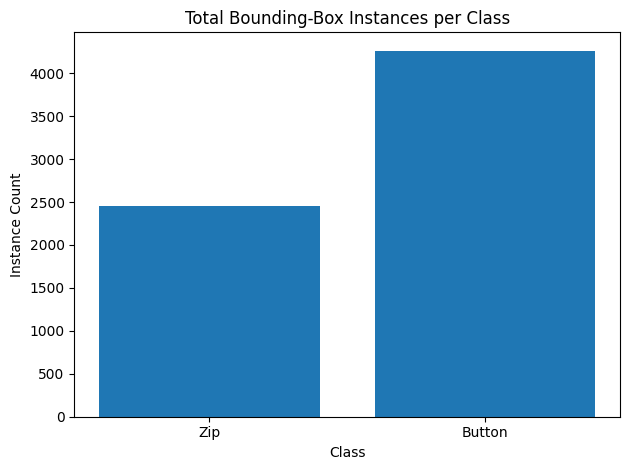

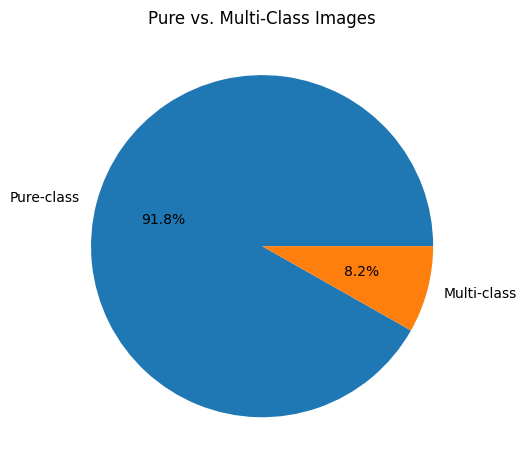

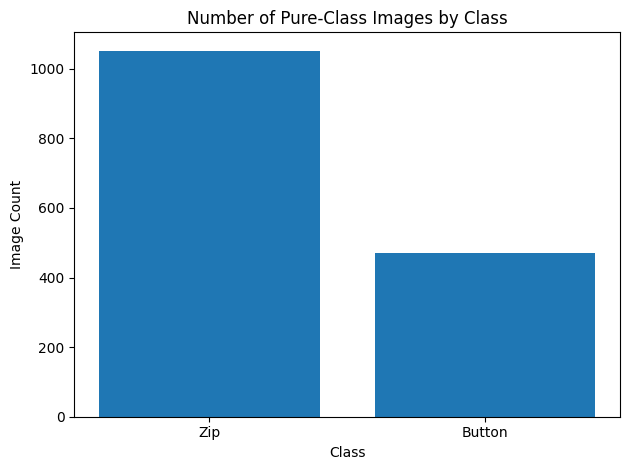

In [ ]:
import os
import glob
from collections import Counter
import matplotlib.pyplot as plt

# ─── CONFIGURE HERE ──────────────────────────────────────────────────────────
BASE_DIR = "/content/drive/MyDrive/yolo_colab/subset_80_10_10"
# ─────────────────────────────────────────────────────────────────────────────

# 1) Recursively find all annotation .txt files
ann_paths = glob.glob(os.path.join(BASE_DIR, "**", "*.txt"), recursive=True)
# If you have a global 'labels.txt', filter it out:
ann_paths = [p for p in ann_paths if os.path.basename(p).lower() != "labels.txt"]

print(f"Found {len(ann_paths)} annotation files:")
for p in ann_paths:
    print("  ", p)
print()

# 2) Parse each file: collect per-image classes and all instances
per_image_classes = {}
all_instances = []

for path in ann_paths:
    with open(path, 'r') as f:
        # YOLO format: each line = class_id x_center y_center width height
        classes = [int(line.split()[0]) for line in f if line.strip()]
    per_image_classes[path] = classes
    all_instances.extend(classes)

# 3) Compute counts
instance_counts = Counter(all_instances)            # class-instance counts
pure_images = {img: cls_list[0]
               for img, cls_list in per_image_classes.items()
               if len(set(cls_list)) == 1}
multi_images = [img for img, cls_list in per_image_classes.items()
                if len(set(cls_list)) > 1]
pure_counts = Counter(pure_images.values())        # pure-image counts per class

# 4) Map numeric IDs to names
class_map = {0: "Zip", 1: "Button"}
inst_named = {class_map[k]: v for k, v in instance_counts.items()}
pure_named = {class_map[k]: v for k, v in pure_counts.items()}

# 5) Print summary
print("=== Total Bounding-Box Instances per Class ===")
for cls, cnt in inst_named.items():
    print(f"  {cls}: {cnt}")
print(f"\nTotal images processed: {len(ann_paths)}")
print(f"Pure-class images: {len(pure_images)}")
print(f"Multi-class images: {len(multi_images)}")
print("Pure-class breakdown:")
for cls, cnt in pure_named.items():
    print(f"  {cls}-only: {cnt}")

# 6) Plots

# a) Bar chart of total instances per class
plt.figure()
plt.bar(inst_named.keys(), inst_named.values())
plt.title("Total Bounding-Box Instances per Class")
plt.xlabel("Class")
plt.ylabel("Instance Count")
plt.tight_layout()
plt.show()

# b) Pie chart: pure vs. multi-class images
sizes = [len(pure_images), len(multi_images)]
if sum(sizes) > 0:
    plt.figure()
    plt.pie(sizes, labels=["Pure-class", "Multi-class"], autopct="%1.1f%%")
    plt.title("Pure vs. Multi-Class Images")
    plt.tight_layout()
    plt.show()

# c) Bar chart of pure-class image counts by class
if pure_named:
    plt.figure()
    plt.bar(pure_named.keys(), pure_named.values())
    plt.title("Number of Pure-Class Images by Class")
    plt.xlabel("Class")
    plt.ylabel("Image Count")
    plt.tight_layout()
    plt.show()


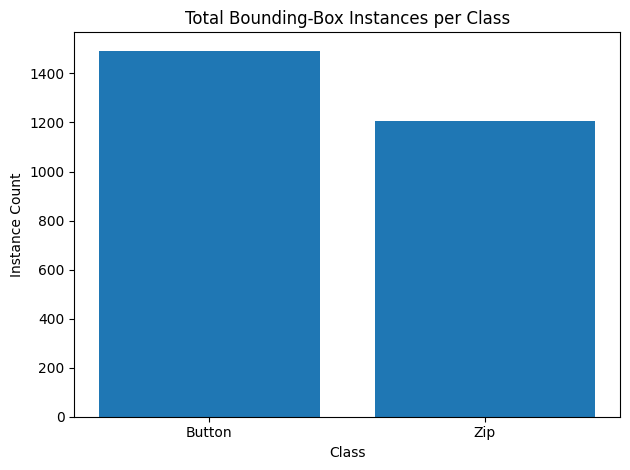

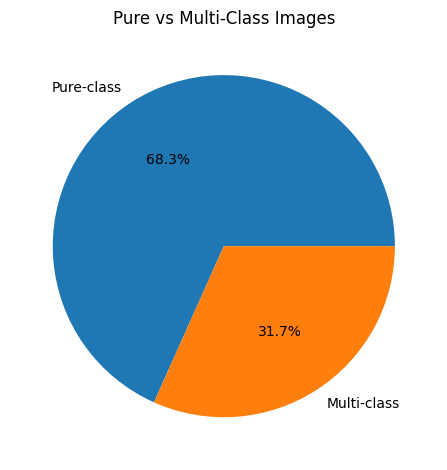

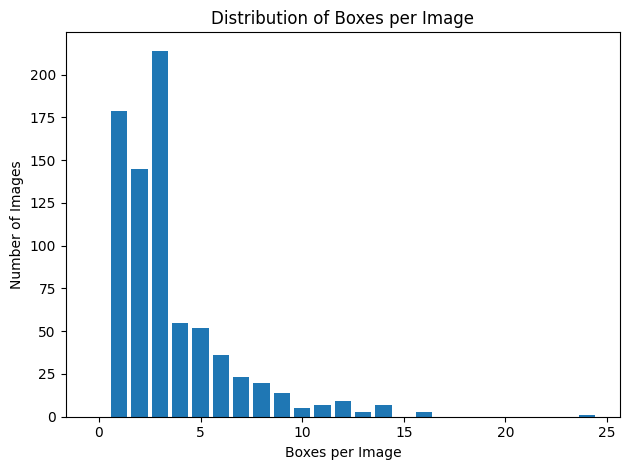

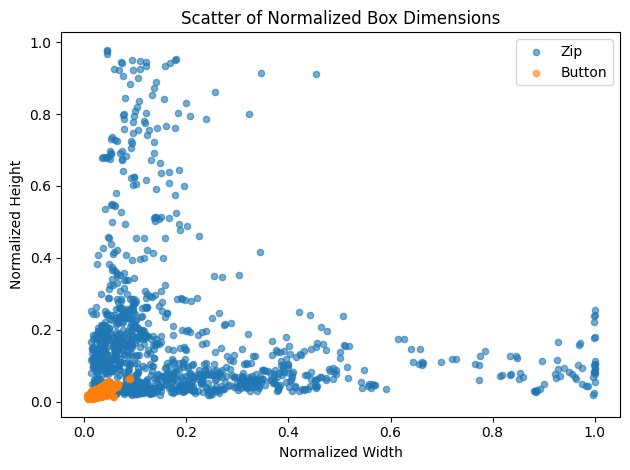

In [ ]:
import os
import glob
from collections import Counter
import matplotlib.pyplot as plt

# ─── CONFIGURE HERE ──────────────────────────────────────────────────────────
BASE_DIR = "/content/drive/MyDrive/yolo_colab/subset_80_10_10_new"
# ─────────────────────────────────────────────────────────────────────────────

# 1) Find all annotation .txt files
ann_paths = glob.glob(os.path.join(BASE_DIR, "**", "*.txt"), recursive=True)
ann_paths = [p for p in ann_paths if os.path.basename(p).lower() != "labels.txt"]

# 2) Parse annotations
per_image_classes = {}
all_classes = []
boxes_per_image = []
w_norm_list = []
h_norm_list = []

for path in ann_paths:
    with open(path, 'r') as f:
        lines = [ln.split() for ln in f if ln.strip()]
    classes = [int(split[0]) for split in lines]
    per_image_classes[path] = classes
    all_classes.extend(classes)
    boxes_per_image.append(len(classes))
    w_norm_list.extend([float(s[3]) for s in lines])
    h_norm_list.extend([float(s[4]) for s in lines])

# 3) Compute counts
instance_counts = Counter(all_classes)
pure = {img: cls[0] for img, cls in per_image_classes.items() if len(set(cls)) == 1}
multi = [img for img, cls in per_image_classes.items() if len(set(cls)) > 1]
pure_counts = Counter(pure.values())

# 4) Map to names
class_map = {0: "Zip", 1: "Button"}
inst_named = {class_map[k]: v for k, v in instance_counts.items()}
pure_named = {class_map[k]: v for k, v in pure_counts.items()}

# 5) Plot 1: Total instances per class
plt.figure()
plt.bar(inst_named.keys(), inst_named.values())
plt.title("Total Bounding-Box Instances per Class")
plt.xlabel("Class")
plt.ylabel("Instance Count")
plt.tight_layout()
plt.show()

# 6) Plot 2: Pure vs Multi-class images
sizes = [len(pure), len(multi)]
labels = ["Pure-class", "Multi-class"]
plt.figure()
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Pure vs Multi-Class Images")
plt.tight_layout()
plt.show()

# 7) Plot 3: Distribution of boxes per image
plt.figure()
plt.hist(boxes_per_image, bins=range(0, max(boxes_per_image)+2), align='left', rwidth=0.8)
plt.title("Distribution of Boxes per Image")
plt.xlabel("Boxes per Image")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

# 8) Plot 4: Scatter of normalized width vs height by class
plt.figure()
for cls_id, color in zip([0,1], ['C0','C1']):
    xs = [w for w, c in zip(w_norm_list, all_classes) if c == cls_id]
    ys = [h for h, c in zip(h_norm_list, all_classes) if c == cls_id]
    plt.scatter(xs, ys, alpha=0.6, label=class_map[cls_id], s=20, c=color)
plt.title("Scatter of Normalized Box Dimensions")
plt.xlabel("Normalized Width")
plt.ylabel("Normalized Height")
plt.legend()
plt.tight_layout()
plt.show()
